# Import modules for cleansing data

In [1]:
import re
import pandas as pd
import numpy as np
from Packages.DataPreperation import CleanData
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob as txt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from datetime import time
from nltk.tokenize import RegexpTokenizer
from sklearn import svm
import matplotlib.pyplot as plt

# Read Data

In [2]:
sentimentData = pd.read_csv(r"Data\IMDB Dataset.csv")
sentimentData.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Test for the distribution of results

In [3]:
Sentiment2 = sentimentData

Sentiment2['sentiment'] = Sentiment2['sentiment'].replace("negative", 0)
Sentiment2['sentiment'] = Sentiment2['sentiment'].replace("positive", 1)

Sentiment2['sentiment'].value_counts()

0    25000
1    25000
Name: sentiment, dtype: int64

<AxesSubplot:>

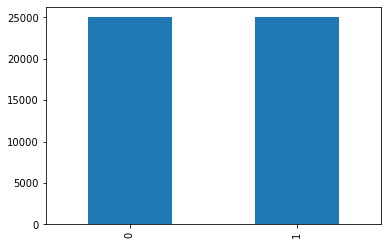

In [4]:
sentimentData['sentiment'].value_counts().plot.bar()


In [4]:
perform = CleanData()

removeEmojis = True
CleanText = True
removeStopWords = True
lemmatizeText = True
POSLemmatizeTextFor = False
Stemtextfor = False
textcol = "review"

if CleanText == True:
    Sentiment2 = perform.GeneralCleansingFor(Sentiment2, textcol)
if removeEmojis == True:
    Sentiment2 = perform.RemoveEmoticonsFor(Sentiment2)
if removeStopWords == True:
    Sentiment2 = perform.RemoveStopWordsFor(Sentiment2)
if lemmatizeText == True:
    Sentiment2 = perform.LemmatizeTextFor(Sentiment2)
if POSLemmatizeTextFor == True:
    Sentiment2 = perform.POSLemmatizeTextFor(Sentiment2)
if Stemtextfor == True:
    Sentiment2 = perform.StemTextFor(Sentiment2)

Data cleansing initialised.


# Perform tokenisation and create test set

In [5]:
token = RegexpTokenizer(r"[a-zA-Z0-9]+")
cv = CountVectorizer(stop_words="english",ngram_range=(1,1),tokenizer=token.tokenize)
text_counts = cv.fit_transform(Sentiment2["newReview"])
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, Sentiment2["sentiment"], test_size=0.25, random_state=5)

# Naive Bayes

In [13]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("accuracy: " + str('{:4.2f}'.format(accuracy_score*100))+'%')

macro_precision = (metrics.precision_score(Y_test, predicted, average='binary'))
macro_precision = (round(macro_precision,2))*100
print("precision: " + str(macro_precision))

macro_recall = (metrics.recall_score(Y_test, predicted, average='binary'))
macro_recall = (round(macro_recall,2))*100
print("recall: " + str(macro_recall))

macro_f1 = (metrics.f1_score(Y_test, predicted, average='binary'))
macro_f1 = (round(macro_f1,2))*100
print("F1: " + str(macro_f1))

conf_mat = confusion_matrix(Y_test, predicted)
print("confusion matrix: \n" + str(conf_mat))



accuracy: 86.14%
precision: 88.0
recall: 84.0
F1: 86.0
confusion matrix: 
[[5412  737]
 [ 996 5355]]


In [14]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      6149
           1       0.88      0.84      0.86      6351

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



# Logistic Regression

In [10]:
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(X_train,Y_train)
lg_pred = lr.predict(X_test)
print("Accuracy: ",round((metrics.accuracy_score(Y_test,lg_pred))*100,3),"%")

macro_precision = (metrics.precision_score(Y_test, lg_pred, average='binary'))
macro_precision = (round(macro_precision,2))*100
print(macro_precision)

macro_recall = (metrics.recall_score(Y_test, lg_pred, average='binary'))
macro_recall = (round(macro_recall,2))*100
print(macro_recall)

macro_f1 = (metrics.f1_score(Y_test, lg_pred, average='binary'))
macro_f1 = (round(macro_f1,2))*100
print(macro_f1)

conf_mat = confusion_matrix(Y_test, lg_pred)
print(conf_mat)

Accuracy:  88.208 %
88.0
89.0
88.0
[[5377  772]
 [ 702 5649]]


In [12]:
print(classification_report(Y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6149
           1       0.88      0.89      0.88      6351

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



# KNN

try wordvec2

In [16]:
acc_list = []
prec_list = []
rec_list = []
f1_list = []
for k in range(1,10):

    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, Y_train) #Fitting the built-in sklearn classifier on our training data
    kPred = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.

    accuracy_score = (metrics.accuracy_score(Y_test,kPred))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(Y_test, kPred)
    class_report = classification_report(Y_test, kPred)

    macro_precision = (metrics.precision_score(Y_test, kPred, average='binary'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(Y_test, kPred, average='binary'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)
    
    macro_f1 = (metrics.f1_score(Y_test, kPred, average='binary'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    print(confusion_mat)
    print("\nClassification Report for k = {} is:\n".format(k))
    print(class_report)



Confusion Matrix for k = 1 is:

[[3621 2528]
 [2255 4096]]

Classification Report for k = 1 is:

              precision    recall  f1-score   support

           0       0.62      0.59      0.60      6149
           1       0.62      0.64      0.63      6351

    accuracy                           0.62     12500
   macro avg       0.62      0.62      0.62     12500
weighted avg       0.62      0.62      0.62     12500



Confusion Matrix for k = 2 is:

[[5016 1133]
 [3794 2557]]

Classification Report for k = 2 is:

              precision    recall  f1-score   support

           0       0.57      0.82      0.67      6149
           1       0.69      0.40      0.51      6351

    accuracy                           0.61     12500
   macro avg       0.63      0.61      0.59     12500
weighted avg       0.63      0.61      0.59     12500



Confusion Matrix for k = 3 is:

[[3852 2297]
 [2367 3984]]

Classification Report for k = 3 is:

              precision    recall  f1-score   sup

# SVM

In [6]:
svmModel = svm.SVC(kernel='linear')

svmModel.fit(X_train, Y_train)

svmPred = svmModel.predict(X_test)

print(classification_report(Y_test, svmPred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      6149
           1       0.86      0.86      0.86      6351

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500

